In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
import matplotlib.pyplot as plt

# create discretizer
kbins = KBinsDiscretizer(n_bins=2, strategy='uniform', encode='ordinal')
#kbins6 = KBinsDiscretizer(n_bins=6, strategy='uniform', encode='ordinal')

# read spambase.data into pandas dataframe
df = pd.read_csv('spambase.data',header = None)
print(len(df))
df.head()

4601


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [80]:
def plot_bins(values):
    """visualizes the number of observations in each bin"""

    counter = Counter(values)
    plt.bar(counter.keys(), counter.values())
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()

def show_bins(bins):
    """Shows the ranges of values the bins comprises"""

    for i in range(len(bins)-1):
        print(f'Bin {i}: {str(bins[i])} -> {str(bins[i+1])}')

4601


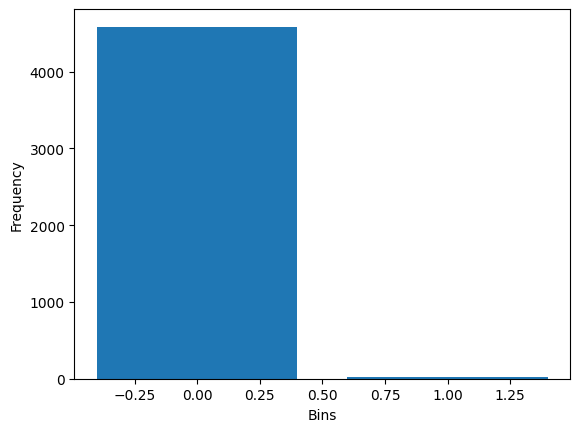

Bin 0: 0.0 -> 2.27
Bin 1: 2.27 -> 4.54


In [81]:
# Equal-Width Discretization
att = df.iloc[:, 0:1] # select 1st 48 attributes
#att48 = df.iloc[:, 0:48] # select 1st 48 attributes
# att54 = df.iloc[:, 48:54] # select following 6 attributes
# att55 = df.iloc[:, 54:55] # select following 1 attributes
# att56 = df.iloc[:, 55:56] # select following 1 attributes
# att57 = df.iloc[:, 56:57] # select following 1 attributes
att_bin = kbins.fit_transform(np.array(att).reshape(-1,1))
# att_bin48 = kbins.fit_transform(np.array(att48).reshape(-1,48))
# att_bin54 = kbins.fit_transform(np.array(att54).reshape(-1,6))
# att_bin55 = kbins.fit_transform(np.array(att55).reshape(-1,1))
# att_bin56 = kbins.fit_transform(np.array(att56).reshape(-1,1))
# att_bin57 = kbins.fit_transform(np.array(att57).reshape(-1,1))
print(len(att_bin))

att_bin_df = pd.DataFrame(att_bin)
# att_bin_df48 = pd.DataFrame(att_bin48)
# att_bin_df54 = pd.DataFrame(att_bin54)
# att_bin_df55 = pd.DataFrame(att_bin55)
# att_bin_df56 = pd.DataFrame(att_bin56)
# att_bin_df57 = pd.DataFrame(att_bin57)
att_bin_df.head(100)
# show results
plot_bins(Counter(list(att_bin.flatten())))
show_bins(kbins.bin_edges_[0])
# frames = [att_bin_df48, att_bin_df54, att_bin_df55, att_bin_df56, att_bin_df57]

#data = pd.concat(frames, axis=1)
#data.head(100)


In [82]:
df[df[0] >= 2.27]

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
566,2.43,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,3.666,13,44,1
588,2.32,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.277,0.000,0.0,3.200,13,48,1
683,2.32,0.00,0.77,0.0,1.55,0.00,0.00,0.0,0.00,0.00,...,0.0,0.134,0.0,0.671,0.000,0.0,129.500,515,518,1
916,2.35,0.00,0.00,0.0,0.00,0.00,2.35,0.0,2.35,0.00,...,0.0,0.000,0.0,0.168,0.336,0.0,4.576,17,119,1
1630,4.54,4.54,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,3.076,0.000,0.0,1.428,4,10,1
2077,2.77,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.213,0.000,0.0,1.750,6,49,0
2215,2.77,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.100,2,11,0
2827,2.27,0.00,2.27,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.401,0.0,0.000,0.000,0.0,1.000,1,5,0
3186,3.94,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.800,5,36,0
3479,3.03,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.609,0.0,0.000,0.000,0.0,1.181,3,13,0
